# Data Analysis Notebook
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [47]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# Path Setup
# --------------------------------------------------
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# If running inside "Scripts", move up to project root
if os.path.basename(current_dir) == "Scripts":
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to project root: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, "Scripts")
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# --------------------------------------------------
# Module Imports
# --------------------------------------------------
try:
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper
except ImportError:
    # Fallback: ensure current directory is in sys.path
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper


Current working directory: c:\Users\Administrator\Desktop\fintech-customer-experience-analytics


## 1. Run Scraper

In [ ]:
print("Starting Scraper")

# Run the main scraper function
raw_df = run_scraper()

print("\nScraping Finished.")

# Show a preview of the scraped data
try:
    # Works in Jupyter/IPython
    from IPython.display import display
    display(raw_df.head())
except ImportError:
    # Fallback for plain Python scripts
    print(raw_df.head())


Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.318943
Total Ratings: 38861
Total Reviews: 8336

Awash: Awash Bank
App ID: com.sc.awashpay
Current Rating: 4.324188
Total Ratings: 17785
Total Reviews: 3273

Amharabank: Amharabank
App ID: com.amharabank.Aba_mobile_banking
Current Rating: 4.4607844
Total Ratings: 748
Total Reviews: 185

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:08,  4.20s/it]


Scraping reviews for com.sc.awashpay...
Successfully scraped 400 reviews
Collected 400 reviews for Awash Bank


Banks:  67%|██████▋   | 2/3 [00:08<00:04,  4.16s/it]


Scraping reviews for com.amharabank.Aba_mobile_banking...
Successfully scraped 183 reviews
Collected 183 reviews for Amharabank


Banks: 100%|██████████| 3/3 [00:12<00:00,  4.03s/it]


Scraping Complete!

Total reviews collected: 983
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Awash Bank: 400
  Amharabank: 183

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Rating: ⭐⭐⭐
Review: maaliif daddafee install gaafata...
Date: 2025-11-28 13:36:32

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-28 11:33:17

Awash Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐
Review: I can't access the loan in the app. only it work in USSD...
Date: 2025-11-28 23:27:08

Rating: ⭐⭐⭐⭐⭐
Review: no one from all ethiopian bank keep it up nice...
Date: 2025-11-28 16:59:30

Rating: ⭐⭐⭐⭐⭐
Review: thenk you ✍️🙏...
Date: 2025-11-26 15:21:28

Amharabank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-16 15:06:30

Rating: ⭐⭐⭐⭐⭐
Revie

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [ ]:
import logging
from preprocessing import ReviewPreprocessor

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.StreamHandler()]
)

def main():
    # Initialize the preprocessor
    preprocessor = ReviewPreprocessor()

    # Run the preprocessing pipeline
    success = preprocessor.process()

    if success:
        logging.info("Preprocessing finished successfully!")
        df = preprocessor.df
        # Preview the first few rows
        print("\n Processed reviews:")
        print(df.head())
        return df
    else:
        logging.error("Preprocessing failed.")
        return None

if __name__ == "__main__":
    processed_df = main()


2025-11-30 10:33:48,682 [INFO] Preprocessing finished successfully!


STARTING DATA PREPROCESSING
Loading raw data...
Loaded 983 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 980 (99.69%)
  app_id: 217 (22.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2023-06-18 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 983 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 983
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 983

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Awash Bank: 400
  Commercial Bank of Ethiopia: 400
  Amharabank: 183

Rating distribution:
  ⭐⭐⭐⭐⭐: 699 (71.1%)
  ⭐⭐⭐⭐: 94 (9.6%)
  ⭐⭐⭐: 41 (4.2%)
  ⭐⭐: 29 (3.0%)
  ⭐: 120 (12.2%)

Date range: 2023-06-18 to 2025-11-29

Text statistics:
  Aver

## 3. Visualizations

Let's explore the cleaned data.

2025-11-30 10:28:51,093 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-30 10:28:51,104 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


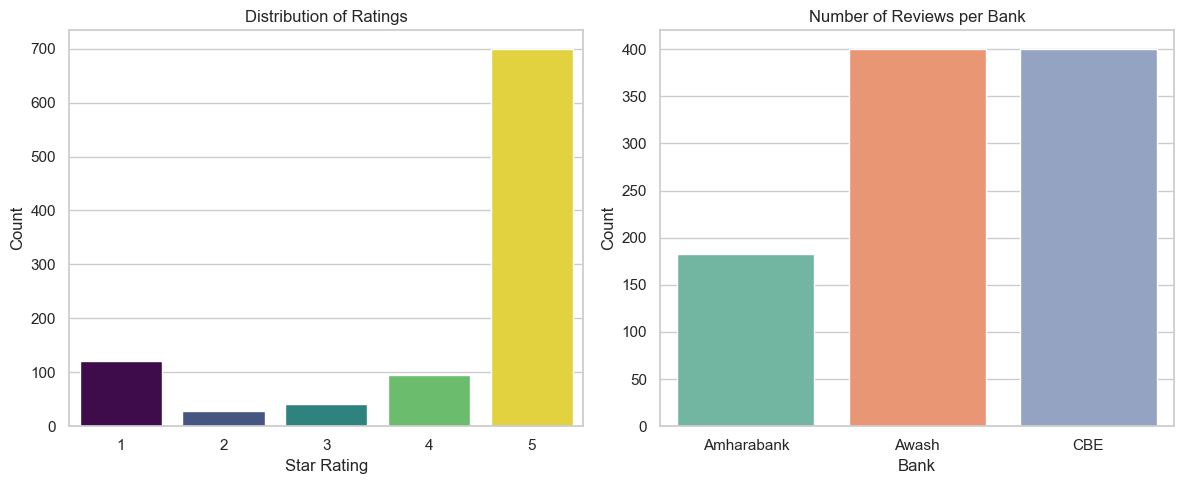

In [42]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5)) 

# Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, hue='rating', palette='viridis', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, hue='bank_code', palette='Set2', legend=False)
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


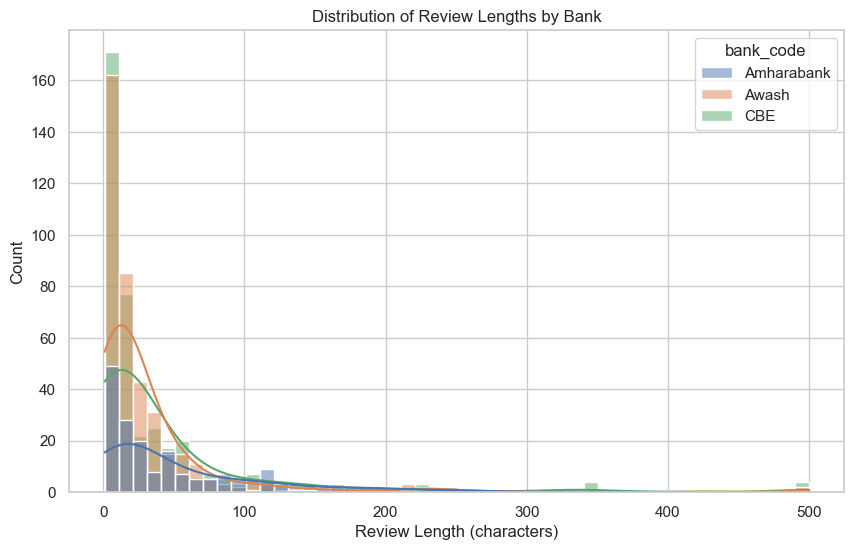

In [10]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()